In [2]:
!pip install regex

In [3]:
import math

In [5]:
import numpy as np


In [9]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt


In [10]:
digits = datasets.load_digits()

In [11]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
digits.data[1]


array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [13]:
digits.data.shape


(1797, 64)

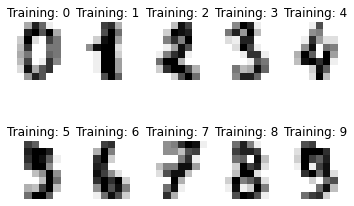

In [14]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    

In [15]:
num_examples = len(digits.data)
num_examples

1797

In [16]:
num_split = int(0.7*num_examples)
num_split


1257

In [18]:
train_features = digits.data[:num_split]
train_features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       [ 0.,  0.,  5., ..., 11.,  3.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.]])

In [19]:
train_labels =  digits.target[:num_split]
train_labels

array([0, 1, 2, ..., 4, 3, 1])

In [20]:
test_features = digits.data[num_split:]
test_features

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  7., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [21]:
test_labels = digits.target[num_split:]
test_labels

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4,
       8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5,
       0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2,
       6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0,
       1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0,
       5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8,
       4, 9, 0, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9,
       8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9,
       6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8,
       9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5,algorithm='brute')


In [23]:
neigh.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

In [24]:
predicted_labels = neigh.predict(test_features)

In [25]:
distances, neighbors = neigh.kneighbors( test_features)
neighbors

array([[ 353,  817,  297,  366, 1254],
       [1177,  588,  725,  824,  328],
       [ 376,  791,  801,  165,  896],
       ...,
       [ 148,  248,  242, 1069,  255],
       [ 254,  251,  849,  417,  199],
       [ 183,  248, 1015,  513,  224]])

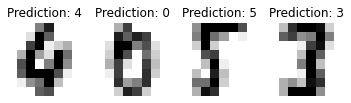

In [62]:
images_and_predictions = list(zip(digits.images[num_split:], predicted_labels))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

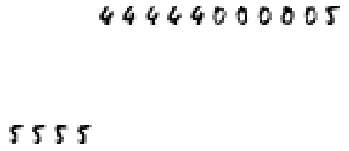

In [63]:
index = 0
for k in range(0,3):
    for i in neighbors[k]:
        plt.subplot(2, 15, 5 + index)
        plt.axis('off')
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        #plt.title('Prediction: %i' % predicted_labels[i])
        index = index + 1

plt.show()

In [28]:
print(metrics.classification_report( test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



In [29]:
metrics.confusion_matrix( test_labels, predicted_labels)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 49,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 52]])

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

In [31]:
clusters = kmeans.fit(train_features)

In [64]:
Center =kmeans.cluster_centers_

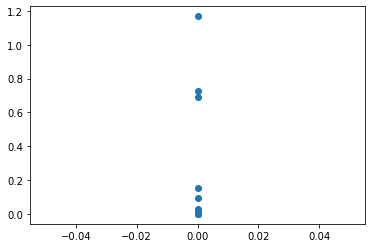

In [33]:
plt.scatter(Center[:, 0], Center[:, 1]);

In [34]:
j=0
len(Center[1])
x=np.zeros(len(Center[1])/2)
y=np.zeros(len(Center[1])/2)
for k in range(0,len(Center)):
         
           
    for i in range(0,len(Center[k])/2-1):
        x=Center[k,i*2]
        y=Center[k,i*2+1]
        j=j+1  

x
y

plt.scatter(x, y);

TypeError: 'float' object cannot be interpreted as an integer

In [36]:
predicted = kmeans.predict(test_features)

In [37]:
print(metrics.classification_report( test_labels, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        53
           3       0.80      0.77      0.79        53
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        54
           8       0.04      0.02      0.03        52
           9       0.02      0.02      0.02        55

    accuracy                           0.08       540
   macro avg       0.09      0.08      0.08       540
weighted avg       0.08      0.08      0.08       540



In [38]:
metrics.confusion_matrix( test_labels, predicted)

array([[ 0,  0,  0,  0,  0, 52,  1,  0,  0,  0],
       [ 1,  0, 35,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  6, 43,  1,  0,  3,  0,  0],
       [ 3,  0,  5, 41,  0,  0,  0,  1,  0,  3],
       [ 1,  0,  0,  0,  0,  1, 52,  0,  1,  2],
       [36,  1,  0,  0,  0,  0,  1, 18,  0,  0],
       [ 0, 52,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0, 52],
       [ 3,  0, 31,  1,  1,  0,  0, 12,  1,  3],
       [ 4,  0,  0,  3,  0,  0,  0, 42,  5,  1]])

In [43]:
cluster_labels = kmeans.predict(train_features)

In [45]:
metrics.completeness_score(train_labels, cluster_labels)

0.7587993887380952

In [46]:
metrics.homogeneity_score(train_labels, cluster_labels)

0.7497781015879379

In [47]:
metrics.adjusted_mutual_info_score(train_labels, cluster_labels)

0.7506859674268311